<a href="https://colab.research.google.com/github/danielborbavareladossantos/colab/blob/master/aspirador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercicio 1 - 
O robo ficara executando sem parar, será nescessário forçar a parada, ou limitar usando o for invés de while, função já esta ali so precisa descomentar. Caso queira executar de maneira estatica também esta no código só será necessário descomentar o estático e comentar o dinâmico

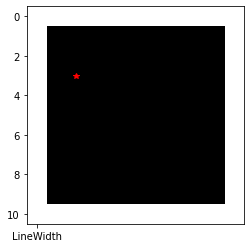

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from random import randrange

# Define direções que o robo irá seguir
direcao = 0
elevacao = 0

# Declaração da matriz de ambiente do robo (dinamico)
m = []
# Ambiente do robo (estatico)
# m = [
#      [1,1,1,1,1,1],
#      [1,0,0,0,0,1],
#      [1,2,0,0,0,1],
#      [1,0,0,0,0,1],
#      [1,0,0,2,2,1],
#      [1,1,1,1,1,1],
# ]

# Tamanho da matriz
tam = 10

# Neste caso o robo começa na posição [1][1]
# posX = 1
# posY = 1
# Neste caso o robo começa em posições aleatórias
posX = randrange(1,tam-1)
posY = randrange(1,tam-1)

def geradorDeMundos(tamanho):
  global m

  for x in range(0,tamanho+1):
    linha = []
    for y in range(0,tamanho+1):

      if (y==0 or x==0 or y == tamanho or x == tamanho):
        linha.append(1)
      else:
        linha.append(2 if(randrange(0,50)>25) else 0)

    m.append(linha)

# Trabalha com o canvas
def exibir(matriz):

  # Para dev.
  # for i in range(0, 40):

  # Execute eterno
  while(True):

    # Mostrar matriz
    plt.imshow(matriz, 'gray')
    plt.plot(posX, posY, '*r', 'LineWidth', 5)
    plt.show(block=False)

    # Chama função de lógica
    theWalkingClean()
    # Pausa a execução do código por 0,5 segundos, para facilitar a visualização
    plt.pause(0.5)
    plt.clf()

    # Limpa plots para dar efeito de frames
    clear_output(wait=True)

# Faz lógica do robo
def theWalkingClean():

  # Declarações de variaveis globais
  global posX
  global posY
  global m
  global direcao
  global elevacao

  # Suga toda sujeira
  if m[posY][posX] == 2:
    m[posY][posX] = 0

  # Verifica se não ta na hora de começar a subir
  if (m[posY][posX-1] == 1) and (m[posY+1][posX] == 1) and elevacao == 0:
    elevacao = 1

  # Verifica se não ta na hora de começar a descer
  if (m[posY][posX+1] == 1) and (m[posY-1][posX] == 1) and elevacao == 1:
    elevacao = 0

  # Verifica se não ta na hora de mudar de direção (Esquerda)
  if m[posY][posX+1] == 1 and direcao == 0:
    # Com base na elevação
    if elevacao == 0:
      posY += 1
    if elevacao == 1:
      posY -= 1
    direcao = 1
    return

  # Verifica se não ta na hora de mudar de direção (Direita)
  if m[posY][posX-1] == 1 and direcao == 1:
    # Com base na elevação
    if elevacao == 0:
      posY += 1
    if elevacao == 1:
      posY -= 1
    direcao = 0
    return

  # Se tiver indo para direita avança uma casa
  if ((m[posY][posX+1] == 0) or (m[posY][posX+1] == 2)) and direcao == 0:
    posX += 1

  # Se tiver indo para esquerda avança uma casa
  if ((m[posY][posX-1] == 0) or (m[posY][posX-1] == 2)) and direcao == 1:
    posX -= 1

# Gerar mundo aleatório
geradorDeMundos(tam)
# Chamada da função principal
exibir(m)

Teste de função gerador de mundos

In [ ]:
from random import randrange

m = []

def geradorDeMundos():
  global m
  tamanho = 6

  for x in range(0,tamanho+1):
    linha = []
    for y in range(0,tamanho+1):

      if (y==0 or x==0 or y == tamanho or x == tamanho):
        linha.append(1)
      else:
        linha.append(2 if(randrange(0,50)>25) else 0)

    m.append(linha)

geradorDeMundos()
print(m)

[[1, 1, 1, 1, 1, 1, 1], [1, 2, 0, 2, 2, 0, 1], [1, 2, 0, 0, 0, 2, 1], [1, 0, 2, 0, 0, 0, 1], [1, 2, 0, 0, 0, 0, 1], [1, 0, 2, 2, 2, 2, 1], [1, 1, 1, 1, 1, 1, 1]]


Exercicio 2 - 

In [108]:
pip install Dijkstar

  Created wheel for Dijkstar: filename=Dijkstar-2.5.0-cp36-none-any.whl size=12171 sha256=cbf619ae7f43af181f512ffbf5b2d034355d1988fb87a304faa239b5c484b9f4
  Stored in directory: /root/.cache/pip/wheels/01/db/b1/ffb012fd94cac8f0cdbf03e665a9894e27cd5cc36bb5823dfd
Successfully built Dijkstar


In [110]:
class Vertice:
    __id: int
    __x: int
    __y: int
    __s: int
    __adjacentes: []

    def __init__(self, id, x, y, s):
        self.id = id
        self.x = x
        self.y = y
        self.s = s
        self.__adjacentes = []

    @property
    def id(self):
        return self.__id

    @id.setter
    def id(self, id):
        try:
            self.__id = id
        except Exception:
            raise Exception('Erro na inserção do atributo id!')

    @property
    def x(self):
        return self.__x

    @x.setter
    def x(self, x):
        try:
            self.__x = x
        except Exception:
            raise Exception('Erro na inserção do atributo x!')

    @property
    def y(self):
        return self.__y

    @y.setter
    def y(self, y):
        try:
            self.__y = y
        except Exception:
            raise Exception('Erro na inserção do atributo y!')

    @property
    def s(self):
        return self.__s

    @s.setter
    def s(self, s):
        try:
            self.__s = s
        except Exception:
            raise Exception('Erro na inserção do atributo s!')

    @property
    def adjacentes(self):
        return self.__adjacentes

    def add_adjacentes(self,v):
        self.__adjacentes.append(v)

    def toString(self):
        return self.__x+" "+self.__y+" "+self.__s

In [310]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from random import randrange
from dijkstar import Graph, find_path

# Grafo
graph = Graph()

# Define direções que o robo irá seguir
direcao = 0
elevacao = 0
uuid = 0
vertices = []
# Tamanho da matriz
tam = 4
sujeiras = [((tam*tam)/tam)+2]

# Declaração da matriz de ambiente do robo (dinamico)
m = []
# Ambiente do robo (estatico)
# m = [
#      [1,1,1,1,1,1],
#      [1,0,0,0,0,1],
#      [1,2,0,0,0,1],
#      [1,0,0,0,0,1],
#      [1,0,0,2,2,1],
#      [1,1,1,1,1,1],
# ]

# Neste caso o robo começa na posição [1][1]
posX = 1
posY = 1
# Neste caso o robo começa em posições aleatórias
# posX = randrange(1,tam-1)
# posY = randrange(1,tam-1)

def find_vertices(vertices,x,y):
  for i in range(0,len(vertices)):
    if (vertices[i].x == x and vertices[i].y == y):
      return vertices[i]

def find_vertices_byid(vertices,id):
  for i in range(0,len(vertices)):
    if (vertices[i].id == id):
      return vertices[i]

def sujo(v):
  if (v == 2):
    return 1
  else:
    return 7

def geradorDeMundos(tamanho):
  global m

  for x in range(0,tamanho+1):
    linha = []
    for y in range(0,tamanho+1):

      if (y==0 or x==0 or y == tamanho or x == tamanho):
        linha.append(1)
      else:
        linha.append(2 if(randrange(0,50)>25) else 0)

    m.append(linha)

# Trabalha com o canvas
def exibir(matriz):

  global posX
  global posY

  # Chama função de lógica
  g = investigaAmbiente()
  sujeiras.append(sujeiras[len(sujeiras)-1])

  for l in range(0,len(sujeiras)-1):
    # cv = find_vertices(vertices,posX,posY)
    path = find_path(g, sujeiras[l], sujeiras[l+1])
    
    #caminha
    for d in range(0,len(path.nodes)):

      # Mostrar matriz
      plt.imshow(matriz, 'gray')
      plt.plot(posX, posY, '*r', 'LineWidth', 5)
      plt.show(block=False)

      v = find_vertices_byid(vertices,path.nodes[d])

      posX = v.x
      posY = v.y
      m[v.y][v.x] = 0

      # Pausa a execução do código por 0,5 segundos, para facilitar a visualização
      plt.pause(0.5)
      plt.clf()

      # Limpa plots para dar efeito de frames
      clear_output(wait=True)

def investigaAmbiente():
  try:
    global m
    global tam
    global uuid
    global posX
    global posY
    global vertices

    for y in range(0,tam+1):
      for x in range(0,tam+1):
        v = Vertice(uuid,x,y,m[y][x])
        vertices.append(v)
        if (v.s == 2):
            sujeiras.append(v.id)
        uuid+=1
        
    for y in range(0,tam):
      for x in range(0,tam):
        current_vertice = find_vertices(vertices,x,y)
        if (current_vertice.s != 1):
          if (x-1 > -1):
            # print("tem a esquerda")
            esquerda_vertice = find_vertices(vertices,x-1,y)
            if (esquerda_vertice.s != 1):
              current_vertice.add_adjacentes(esquerda_vertice)
              graph.add_edge(current_vertice.id, esquerda_vertice.id, sujo(esquerda_vertice.s))
              # print("v: "+str(current_vertice.id)+" v: "+str(esquerda_vertice.id))
              
          if (x+1 < tam):
            # print("tem a direita")
            direita_vertice = find_vertices(vertices,x+1,y)
            if (direita_vertice.s != 1):
              current_vertice.add_adjacentes(direita_vertice)
              graph.add_edge(current_vertice.id, direita_vertice.id, sujo(direita_vertice.s))
              # print("v: "+str(current_vertice.id)+" v: "+str(direita_vertice.id))
              
          if (y-1 > -1):
            # print("tem a acima")
            acima_vertice = find_vertices(vertices,x,y-1)
            if (acima_vertice.s != 1):
              current_vertice.add_adjacentes(acima_vertice)
              graph.add_edge(current_vertice.id, acima_vertice.id, sujo(acima_vertice.s))
              # print("v: "+str(current_vertice.id)+" v: "+str(acima_vertice.id))
              
          if (y+1 < tam):
            # print("tem a baixo")
            baixo_vertice = find_vertices(vertices,x,y+1)
            if (baixo_vertice != None and baixo_vertice.s != 1):
              current_vertice.add_adjacentes(baixo_vertice)
              graph.add_edge(current_vertice.id, baixo_vertice.id, sujo(baixo_vertice.s))
              # print("v: "+str(current_vertice.id)+" v: "+str(baixo_vertice.id))
    return graph;
  except Exception as e:
      print("Erro: ", e)

# Gerar mundo aleatório
geradorDeMundos(tam)

# Chamada da função principal
exibir(m)

<Figure size 432x288 with 0 Axes>